In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data_filename = r"../data/Raport-M1-2020-03-16+04-00-00-Stacja-A18.txt"
with open(data_filename, 'rt') as f:
    header = f.readline(), f.readline(), f.readline()
day, _, line, _, _, station_id, _ = header[0].split(';')
gate_names = header[1].split(';')[1:-1]
column_names = [name + ['_in', '_out'][i % 2] for i, name in enumerate(gate_names)] + ['LF']

In [3]:
station_daily_usage = pd.read_csv(data_filename, skiprows=3, delimiter=';', names = column_names, index_col=0)
station_daily_usage.drop(labels='Suma', axis='index', inplace=True)
station_daily_usage.drop(labels='LF', axis='columns', inplace=True)
station_daily_usage.index = pd.to_datetime([day + ' ' + h for h in station_daily_usage.index])
station_daily_usage.index.name = 'time'

In [4]:
gates_in = station_daily_usage[[c for c in station_daily_usage.columns if 'in' in c]]
gates_out = station_daily_usage[[c for c in station_daily_usage.columns if 'out' in c]]

station_daily_usage['total_in'] = gates_in.sum(axis='columns')
station_daily_usage['total_out'] = gates_out.sum(axis='columns')

In [5]:
round_hours = pd.date_range(day, periods=24, freq='H')
time_buckets = pd.to_datetime(
    pd.cut(
        x = pd.to_numeric(station_daily_usage.index), 
        bins = pd.to_numeric(round_hours), 
        labels = round_hours[:-1]
    )
)
station_daily_usage['hour'] = time_buckets
station_daily_usage = station_daily_usage[['total_in', 'total_out', 'hour']].groupby('hour').sum()
station_daily_usage

,total_in,total_out
hour,,
2020-03-16 00:00:00,6,12
2020-03-16 01:00:00,0,0
2020-03-16 02:00:00,0,0
2020-03-16 03:00:00,0,0
2020-03-16 04:00:00,26,1
2020-03-16 05:00:00,104,57
2020-03-16 06:00:00,213,159
2020-03-16 07:00:00,285,242
2020-03-16 08:00:00,211,138


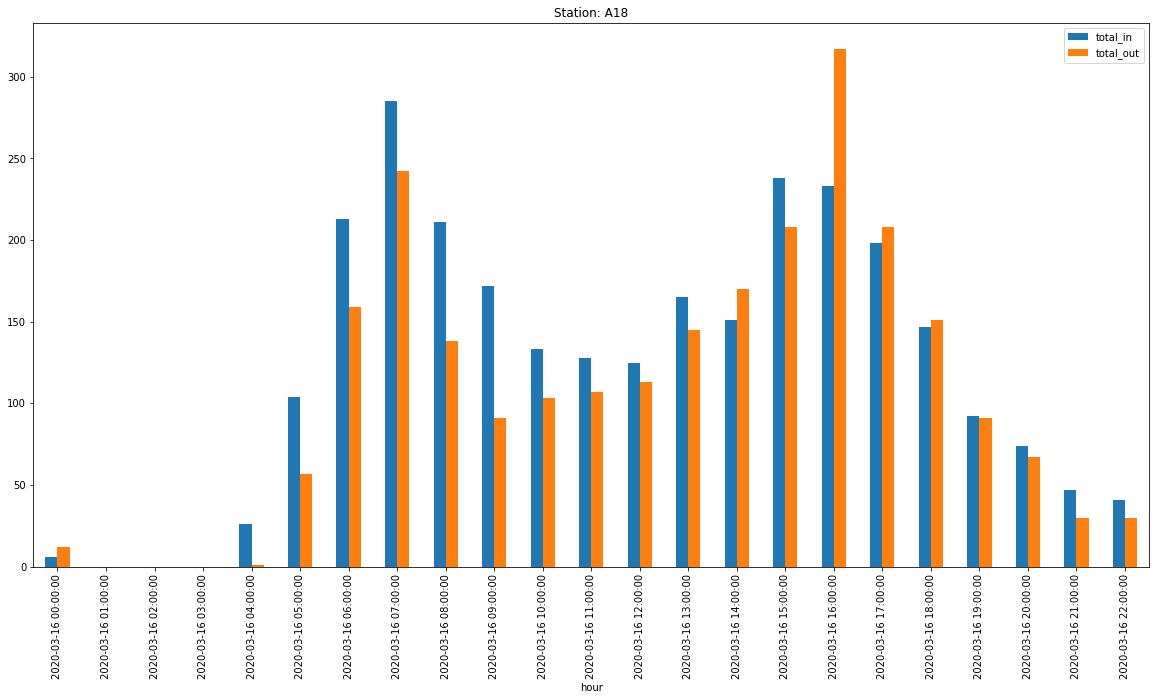

In [6]:
station_daily_usage.plot.bar(figsize=(20,10), title='Station: ' + station_id);